# **Pairwise Sequence Alignment**

# The Needleman-Wunsch Algorithm

The Needleman-Wunsch algorithm finds the optimal *global* alignment (end-to-end) between two sequences.
It consists of the following steps:

1. Construct the grid
2. Choose a scoring system (here we use the original scoring system assigning a score $s$ of 1 to a match, a score $s$ of -1 to a mismatch, and a score $d$ of -1 to a gap/indel)
3. Fill in the scoring matrix $F$ (and construct the pointer matrix on the way)
4. Use the pointer matrix to perform a traceback to recover the optimal warping path

The scores in the scoring matrix $F$ are computed using the already existing scores in the left, top-left, and top cells:

$$
F(i,j)=\max
\begin{cases}
    F(i-1,j-1)+s(x_i,y_i),\\
    F(i-1,j)+d,\\
    F(i,j-1)+d.
\end{cases}
$$

The following image illustrates the scoring and pointer matrices.

<img src="images/nw_matrix.png" width="500" />

We can use the `make_align()` function from our `alignment` module to generate an `align()` function that performs the Needleman-Wunsch algorithm.

In [2]:
import alignment as aln

x = "GATTACA"
y = "CATACCCA"

align = aln.make_align(mode="global")
x_aln, y_aln, warp_path_x, warp_path_y, scoring_mat = align(seq_a=x, seq_b=y)

We can also plot the alignment together with the scoring matrix:

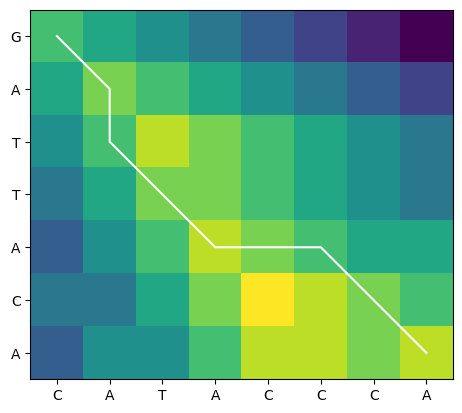

In [3]:
import matplotlib.pyplot as plt  # type: ignore

plt.imshow(X=scoring_mat)
plt.plot(warp_path_y, warp_path_x, "w")
plt.xticks(ticks=range(len(y)), labels=y)
plt.yticks(ticks=range(len(x)), labels=x)
plt.show()

# The Smith-Waterman Algorithm

The Smith-Waterman algorithm finds the optimal *local* alignment between two sequences.
It is a variation of the Needleman-Wunsch algorithm.

The three main differences are:

|                | Smith-Waterman algorithm                                | Needleman-Wunsch algorithm                                                 |
|----------------|---------------------------------------------------------|----------------------------------------------------------------------------|
| Initialization | First row/column = 0                                    | First row/column subject to gap penalty                                    |
| Scoring        | Negative scores are set to 0                            | Scores can be negative                                                     |
| Traceback      | Begin with the highest score, end when 0 is encountered | Begin with the cell at the lower right of the matrix, end at top left cell |

Again, with our `alignment` module, we can perform the local alignment between the sequences `GATACCA` and `NNNNNNNNNNGATTACANNNNNNNNGATNNNNNNNNN`.

Multiple possible traceback starts: [ 5 16], [ 7 17]
Chose random traceback start from choices: [ 5 16]


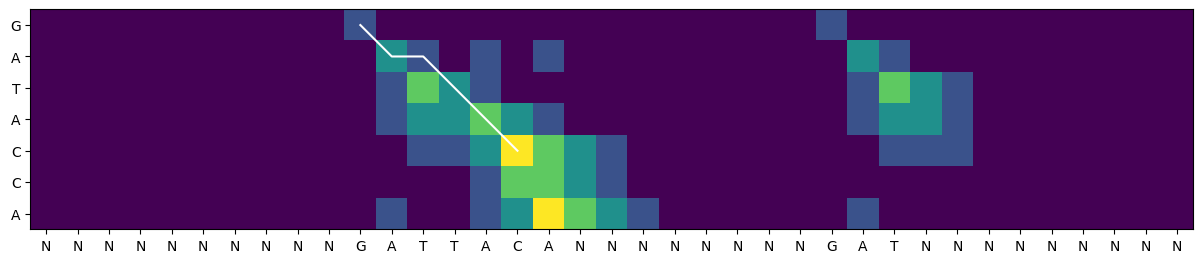

In [4]:
x = "GATACCA"
y = "NNNNNNNNNNGATTACANNNNNNNNGATNNNNNNNNN"

align = aln.make_align(mode="local")
x_aln, y_aln, warp_path_x, warp_path_y, scoring_mat = align(seq_a=x, seq_b=y)

plt.figure(figsize=(15, 8))
plt.imshow(X=scoring_mat)
plt.xticks(ticks=range(len(y)), labels=y)
plt.yticks(ticks=range(len(x)), labels=x)
plt.plot(warp_path_y, warp_path_x, "w")
plt.show()

# Read Alignment

We can also simulate the alignment of many reads originating from e.g., a bulk DNA sequencing experiment.

##### ❓ Sampling reads from a reference sequence

Simulate the generation of a number of reads, by sampling 5 reads from the reference sequence `GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA`.

In [7]:
import random

reference_sequence = "GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA"

n_reads = 20
min_read_len = 15
max_read_len = 25

reads = []

while len(reads) < n_reads:
    range_acquired = False
    while not range_acquired:
        start = random.randint(0, len(reference_sequence) - max_read_len)
        end = random.randint(start + min_read_len, start + max_read_len)
        if end < len(reference_sequence):
            reads.append(reference_sequence[start:end])
            range_acquired = True   

print(reads)

['GATTTGGGGTTCAAAGCA', 'ATAGTAAATCCATTTGTTCA', 'GATTTGGGGTTCAAAGCAGTA', 'GTATCGATCAAATAGTAAATCC', 'CAAATAGTAAATCCATTT', 'GGGGTTCAAAGCAGTATCGATC', 'GATTTGGGGTTCAAAG', 'AATAGTAAATCCATTT', 'TTGGGGTTCAAAGCAGT', 'CGATCAAATAGTAAATC', 'GGGTTCAAAGCAGTATCGATCAAA', 'TTCAAAGCAGTATCGA', 'AATAGTAAATCCATTTGTT', 'GTATCGATCAAATAGT', 'TCAAAGCAGTATCGATCAAATAGTA', 'GCAGTATCGATCAAATAGTAAAT', 'TATCGATCAAATAGTAA', 'AATCCATTTGTTCAACTCACAGTTT', 'GGGGTTCAAAGCAGTATCGA', 'TCAAAGCAGTATCGATCAA']


##### ❓ Adding noise to the sampled reads

Add some noise to the sampled reads.

In [9]:
def add_noise(read: str, noiselessness: int = 4) -> tuple[str, int]:
    """Add noise to a read."""
    choices = ["A", "C", "G", "T"]
    n_noisy_bases = 0
    noisy_read = ""
    for base in read:
        noisy_read += random.choice(seq=choices)
        n_noisy_bases += 1
    return noisy_read, n_noisy_bases


noisy_reads = []
for read in reads:
    noisy_read, n_noisy_bases = add_noise(read=read, noiselessness=3)
    print(f"Added {n_noisy_bases:2} noisy base(s): {read:10s} -> {noisy_read:10s}")
    noisy_reads.append(noisy_read)

Added 18 noisy base(s): GATTTGGGGTTCAAAGCA -> AGATCAATACAAGTTGCC
Added 20 noisy base(s): ATAGTAAATCCATTTGTTCA -> TCAACAGAGCTGAAAGCACA
Added 21 noisy base(s): GATTTGGGGTTCAAAGCAGTA -> CCAAACTAGAAGATAGACTCG
Added 22 noisy base(s): GTATCGATCAAATAGTAAATCC -> TCATGTGATCGCGTTCCTACCA
Added 18 noisy base(s): CAAATAGTAAATCCATTT -> CGACAACAAAATCCTAGA
Added 22 noisy base(s): GGGGTTCAAAGCAGTATCGATC -> CGGTATCGACCTTCTGTGATGC
Added 16 noisy base(s): GATTTGGGGTTCAAAG -> GGTACGAAAACTTTGG
Added 16 noisy base(s): AATAGTAAATCCATTT -> TAGACTTTAACGCCGT
Added 17 noisy base(s): TTGGGGTTCAAAGCAGT -> TACTTCGCAAACGTCAA
Added 17 noisy base(s): CGATCAAATAGTAAATC -> GTCCTATAGTCATCACC
Added 24 noisy base(s): GGGTTCAAAGCAGTATCGATCAAA -> TTTCGGTGTATCCCTCTGTTCGGA
Added 16 noisy base(s): TTCAAAGCAGTATCGA -> TGGAAATAGGAGTCAG
Added 19 noisy base(s): AATAGTAAATCCATTTGTT -> GTACAGGGCAGGCAAACCA
Added 16 noisy base(s): GTATCGATCAAATAGT -> AGTCCTCAAATTCATC
Added 25 noisy base(s): TCAAAGCAGTATCGATCAAATAGTA -> AGGAAAAAAGATCACCA

##### ❓ Aligning reads

Use the `make_align()` function from the `alignment` module to generate an `align()` function to align the noisy reads locally to the reference sequence.

Read                      : AGATCAATACAAGTTGCC
Mapping position (0-based): 46
Aligned read              : TCAA-T-ACAAGTT
Aligned read w/o gaps     : TCAATACAAGTT
Number of clipped bases   : 6
Reference subsequence     : TCAACTCACAGTT


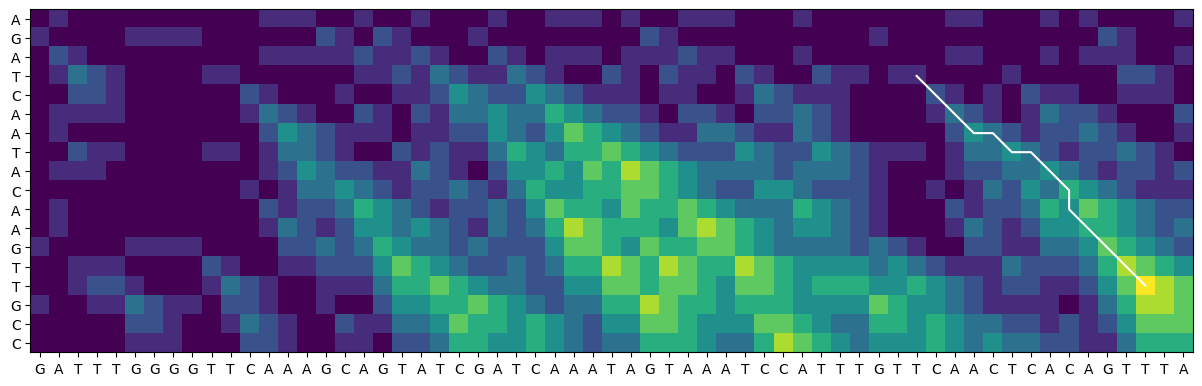

Read                      : TCAACAGAGCTGAAAGCACA
Mapping position (0-based): 25
Aligned read              : TCAACAGAGCTGAAAGCACA
Aligned read w/o gaps     : TCAACAGAGCTGAAAGCACA
Number of clipped bases   : 0
Reference subsequence     : TCAAATAGTAAATCCA


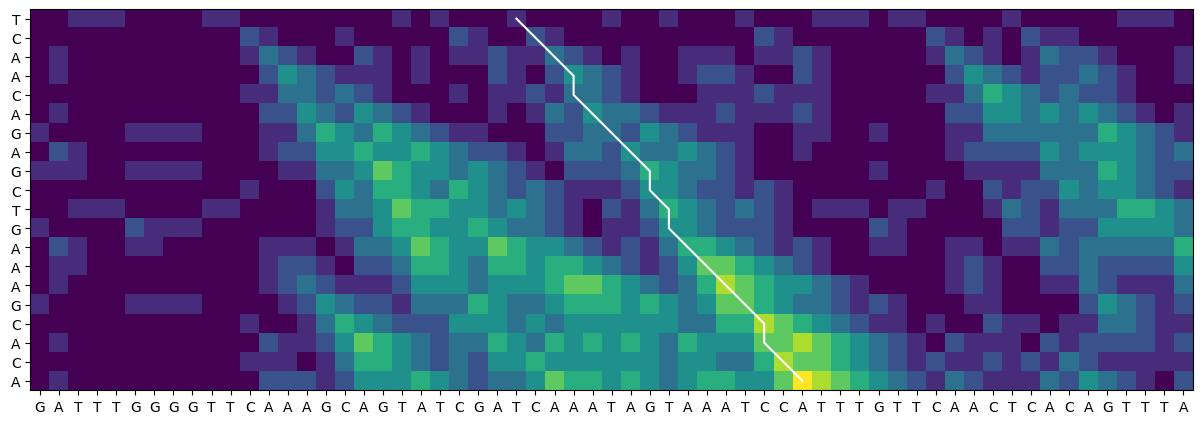

Read                      : CCAAACTAGAAGATAGACTCG
Mapping position (0-based): 26
Aligned read              : CAAACTAG-AAGAT
Aligned read w/o gaps     : CAAACTAGAAGAT
Number of clipped bases   : 8
Reference subsequence     : CAAATAGTAAAT


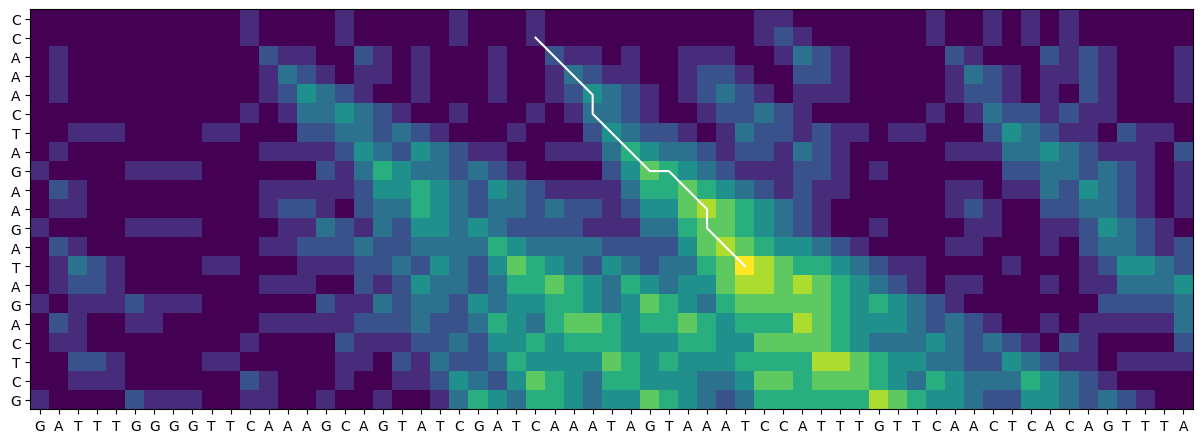

Read                      : TCATGTGATCGCGTTCCTACCA
Mapping position (0-based): 16
Aligned read              : CATGTGATCG
Aligned read w/o gaps     : CATGTGATCG
Number of clipped bases   : 12
Reference subsequence     : CAGTATCG


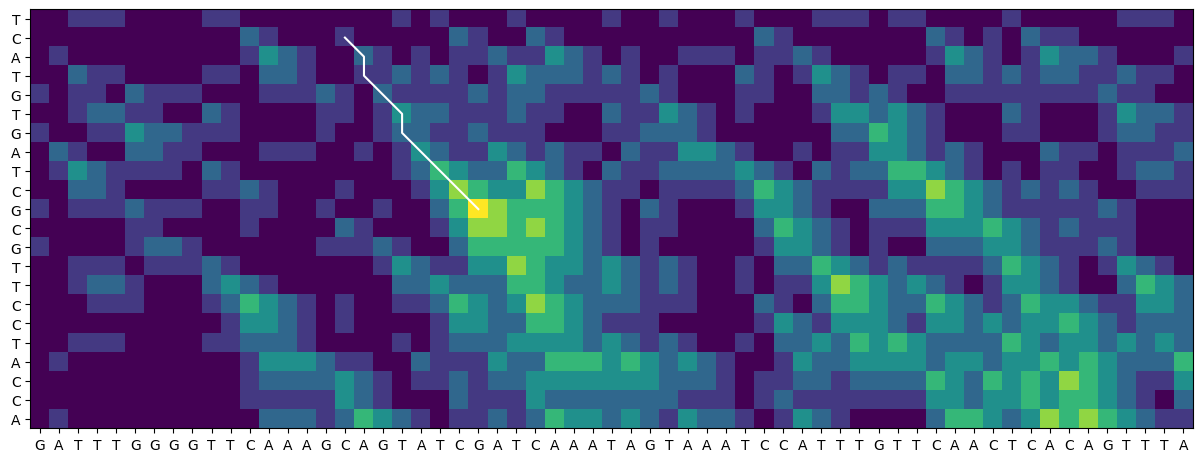

Multiple possible traceback starts: [14 40], [15 42], [16 41]
Chose random traceback start from choices: [16 41]
Read                      : CGACAACAAAATCCTAGA
Mapping position (0-based): 22
Aligned read              : CGA-C-AACA--AAATCCTA
Aligned read w/o gaps     : CGACAACAAAATCCTA
Number of clipped bases   : 2
Reference subsequence     : CGATCAAATAGTAAATCCA


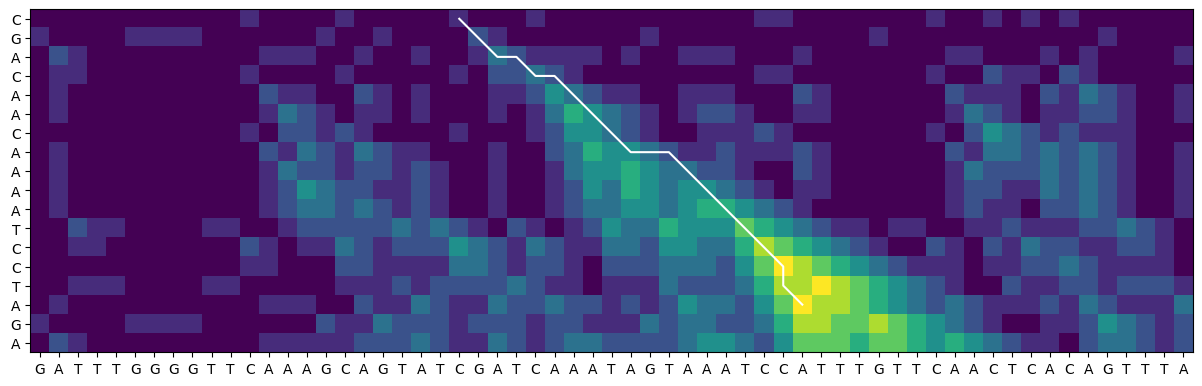

Multiple possible traceback starts: [ 9 25], [10 27], [11 27]
Chose random traceback start from choices: [11 27]
Read                      : CGGTATCGACCTTCTGTGATGC
Mapping position (0-based): 18
Aligned read              : GTATCGACC
Aligned read w/o gaps     : GTATCGACC
Number of clipped bases   : 13
Reference subsequence     : GTATCGATC


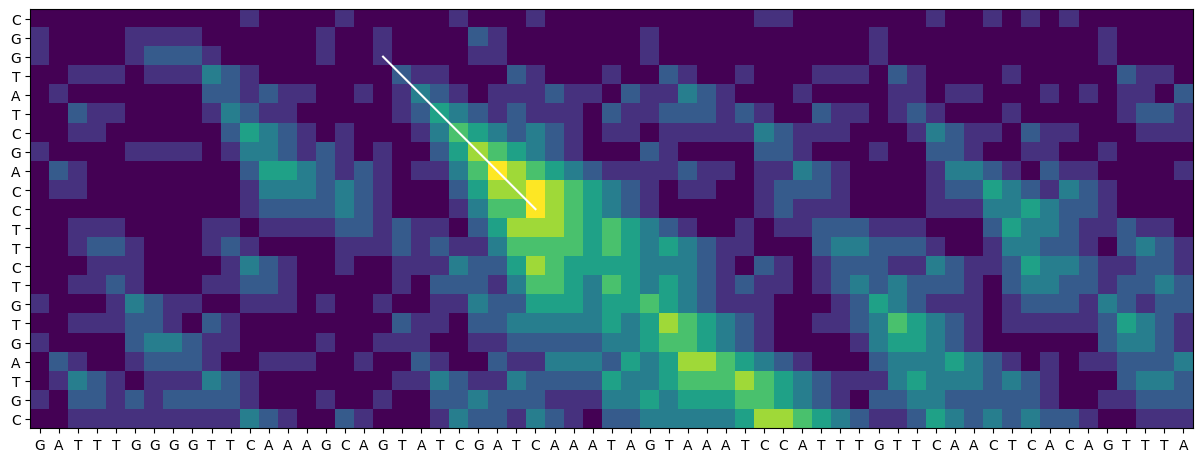

Multiple possible traceback starts: [10 30], [12 31], [15 45]
Chose random traceback start from choices: [10 30]
Read                      : GGTACGAAAACTTTGG
Mapping position (0-based): 18
Aligned read              : GTA-CGA--AAA
Aligned read w/o gaps     : GTACGAAAA
Number of clipped bases   : 7
Reference subsequence     : GTATCGATCAAA


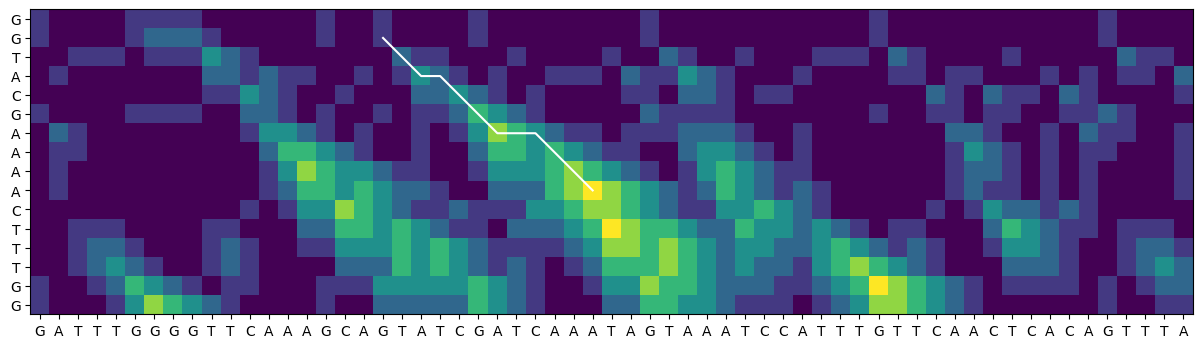

Multiple possible traceback starts: [16 20], [16 58]
Chose random traceback start from choices: [16 20]
Read                      : TAGACTTTAACGCCGT
Mapping position (0-based): 9
Aligned read              : TTTAACGCCGT
Aligned read w/o gaps     : TTTAACGCCGT
Number of clipped bases   : 5
Reference subsequence     : TTCAAAGCAGT


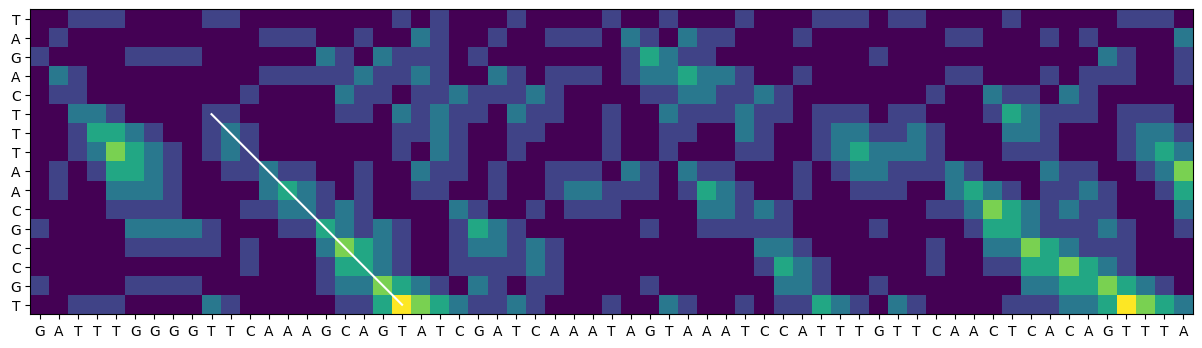

Multiple possible traceback starts: [17 29], [17 36], [17 37]
Chose random traceback start from choices: [17 29]
Read                      : TACTTCGCAAACGTCAA
Mapping position (0-based): 15
Aligned read              : GCA--AACG-TCAA
Aligned read w/o gaps     : GCAAACGTCAA
Number of clipped bases   : 6
Reference subsequence     : GCAGTATCGATCAA


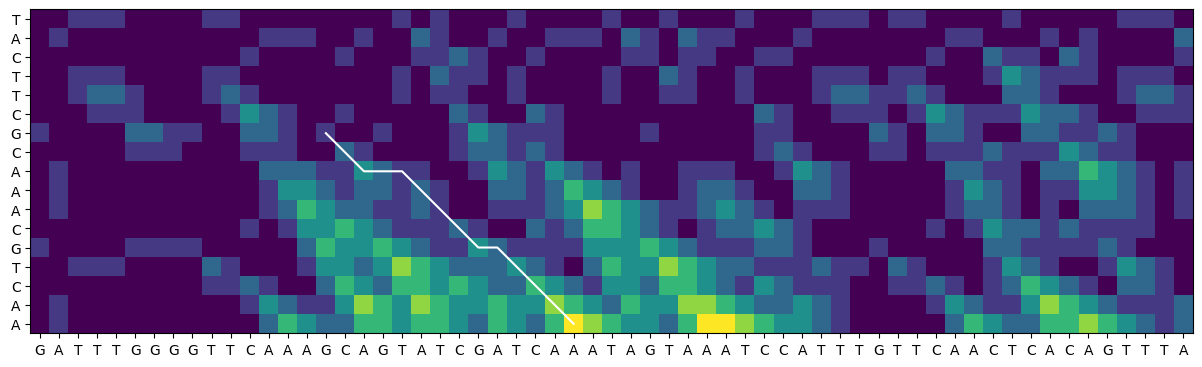

Read                      : GTCCTATAGTCATCACC
Mapping position (0-based): 37
Aligned read              : TCC-TATAG-TC-A-TCAC
Aligned read w/o gaps     : TCCTATAGTCATCAC
Number of clipped bases   : 2
Reference subsequence     : TCCATTTGTTCAACTCAC


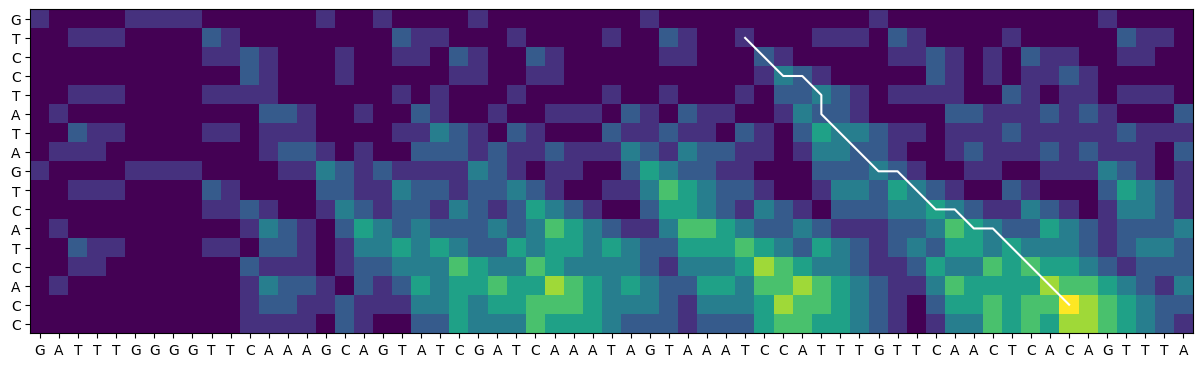

Read                      : TTTCGGTGTATCCCTCTGTTCGGA
Mapping position (0-based): 36
Aligned read              : ATCCCTCTGTTC
Aligned read w/o gaps     : ATCCCTCTGTTC
Number of clipped bases   : 12
Reference subsequence     : ATCCATTTGTTC


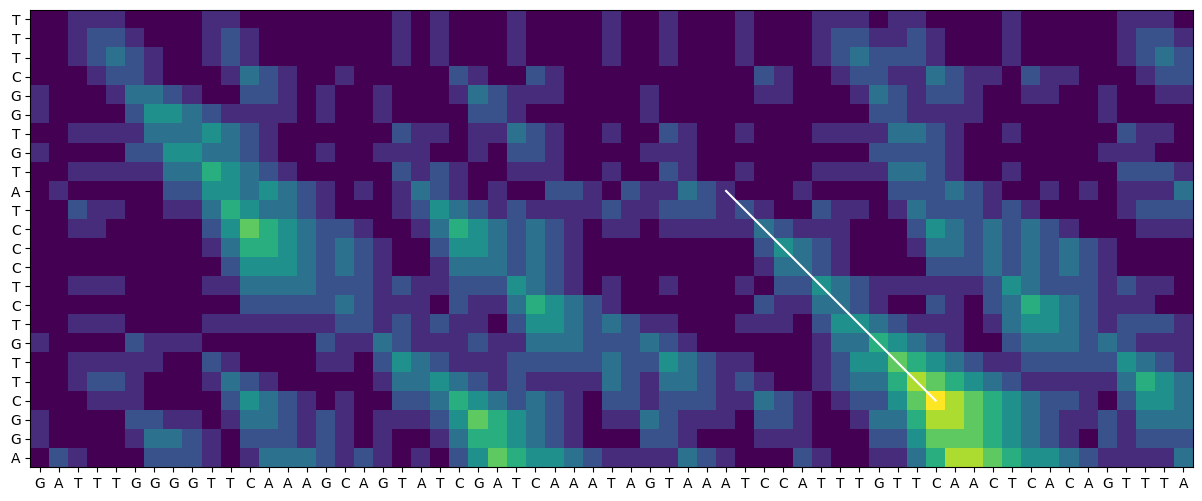

Multiple possible traceback starts: [ 9 33], [11 35], [14 39], [15 41]
Chose random traceback start from choices: [14 39]
Read                      : TGGAAATAGGAGTCAG
Mapping position (0-based): 27
Aligned read              : AAATAG-GAGTC
Aligned read w/o gaps     : AAATAGGAGTC
Number of clipped bases   : 5
Reference subsequence     : AAATAGTAAATC


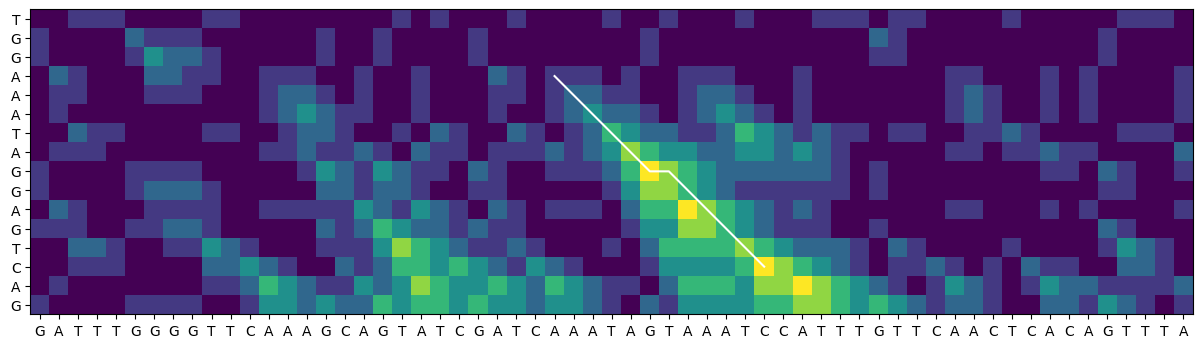

Multiple possible traceback starts: [11 19], [19 18], [19 41]
Chose random traceback start from choices: [19 18]
Read                      : GTACAGGGCAGGCAAACCA
Mapping position (0-based): 11
Aligned read              : CAAACCA
Aligned read w/o gaps     : CAAACCA
Number of clipped bases   : 12
Reference subsequence     : CAAAGCA


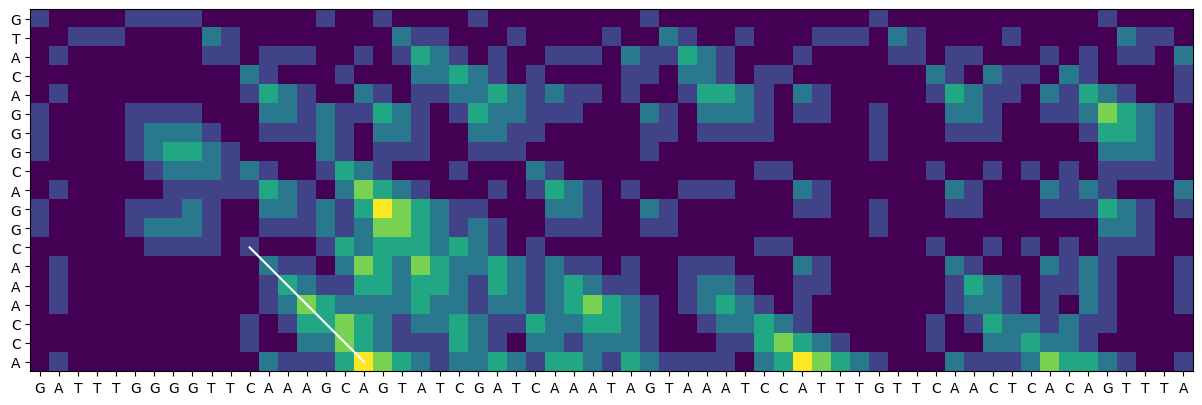

Multiple possible traceback starts: [11 31], [15 42], [16 39]
Chose random traceback start from choices: [11 31]
Read                      : AGTCCTCAAATTCATC
Mapping position (0-based): 25
Aligned read              : TCAAAT
Aligned read w/o gaps     : TCAAAT
Number of clipped bases   : 10
Reference subsequence     : TCAAAT


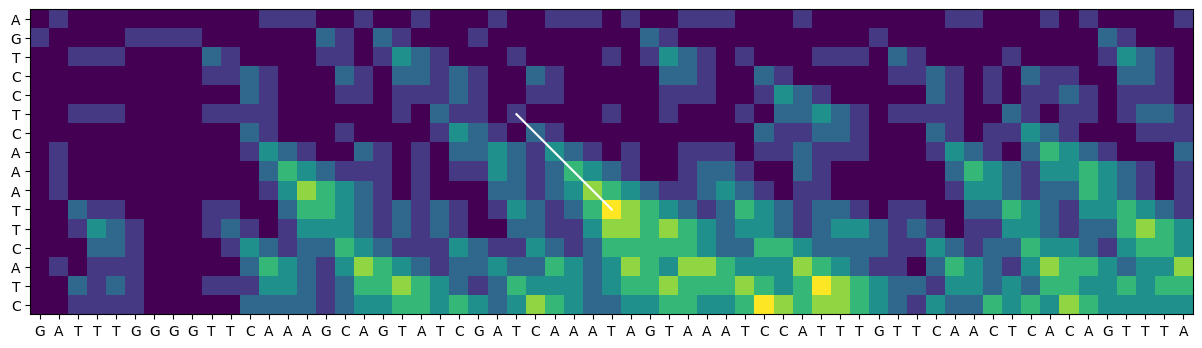

Multiple possible traceback starts: [20 31], [21 33]
Chose random traceback start from choices: [20 31]
Read                      : AGGAAAAAAGATCACCAGATGCGGG
Mapping position (0-based): 12
Aligned read              : AAAAAAG-ATC-ACCAGAT
Aligned read w/o gaps     : AAAAAAGATCACCAGAT
Number of clipped bases   : 8
Reference subsequence     : AAAGCAGTATCGATCAAAT


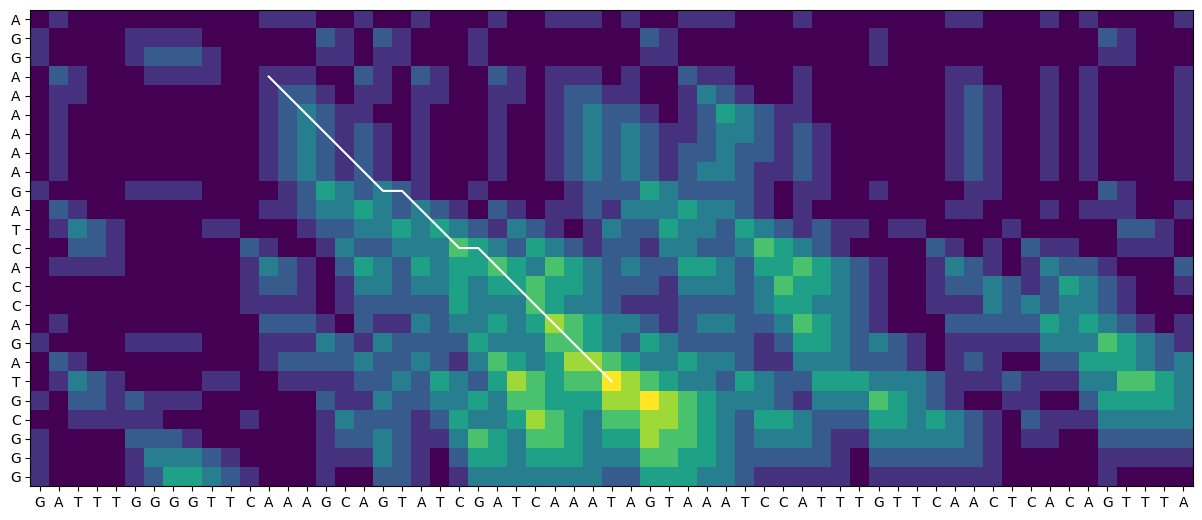

Read                      : GAGCGTGCGTACATTAAACTAGT
Mapping position (0-based): 15
Aligned read              : GC-GTA-C-ATTAAACTAGT
Aligned read w/o gaps     : GCGTACATTAAACTAGT
Number of clipped bases   : 6
Reference subsequence     : GCAGTATCGATCAAATAGT


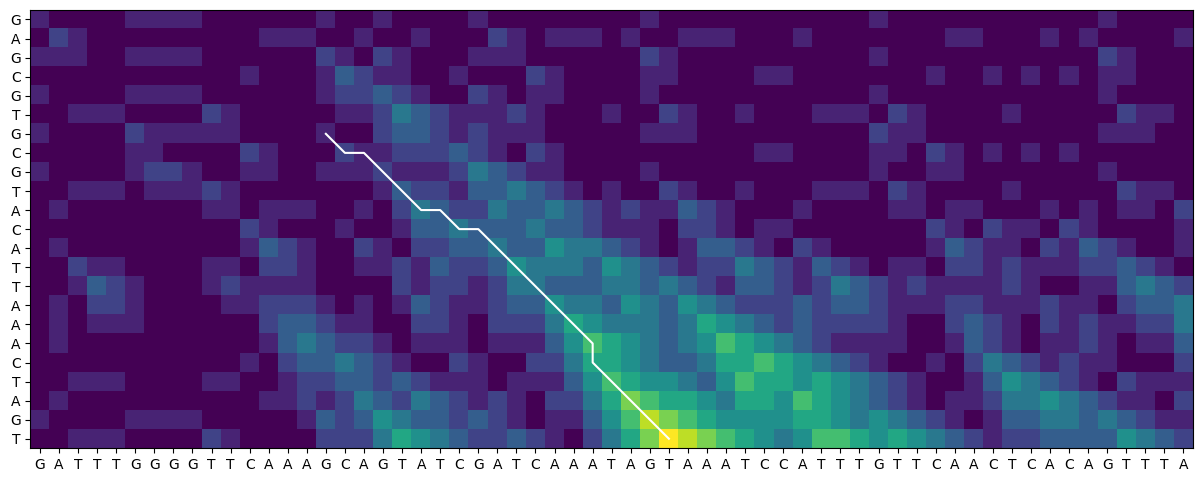

Multiple possible traceback starts: [16 30], [16 37]
Chose random traceback start from choices: [16 30]
Read                      : TCCAACACTAGCCAAAG
Mapping position (0-based): 10
Aligned read              : TCCAA-CACTA--G-CCAAA
Aligned read w/o gaps     : TCCAACACTAGCCAAA
Number of clipped bases   : 1
Reference subsequence     : TCAAAGCAGTATCGATCAAA


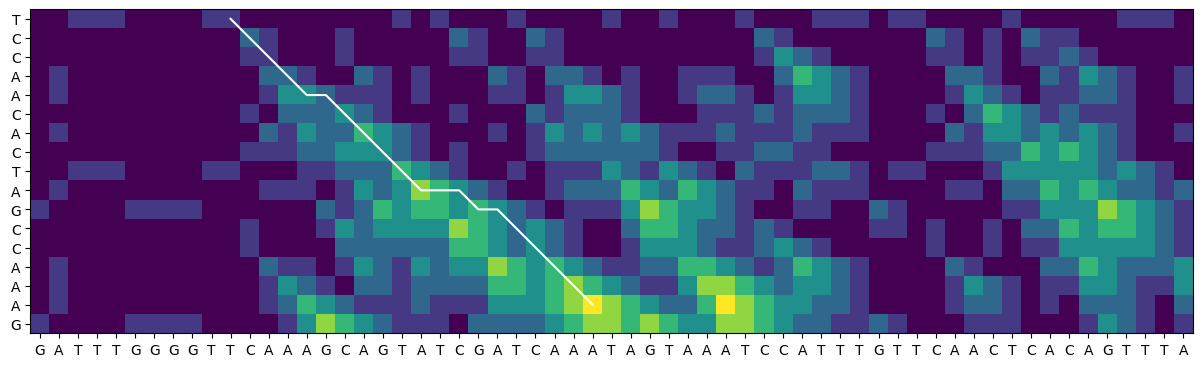

Read                      : GTAAACACGGGCACGAATGGTATTG
Mapping position (0-based): 12
Aligned read              : AAA-CACG-GGC-A-CGAATGGTA
Aligned read w/o gaps     : AAACACGGGCACGAATGGTA
Number of clipped bases   : 5
Reference subsequence     : AAAGCAGTATCGATCAAATAGTA


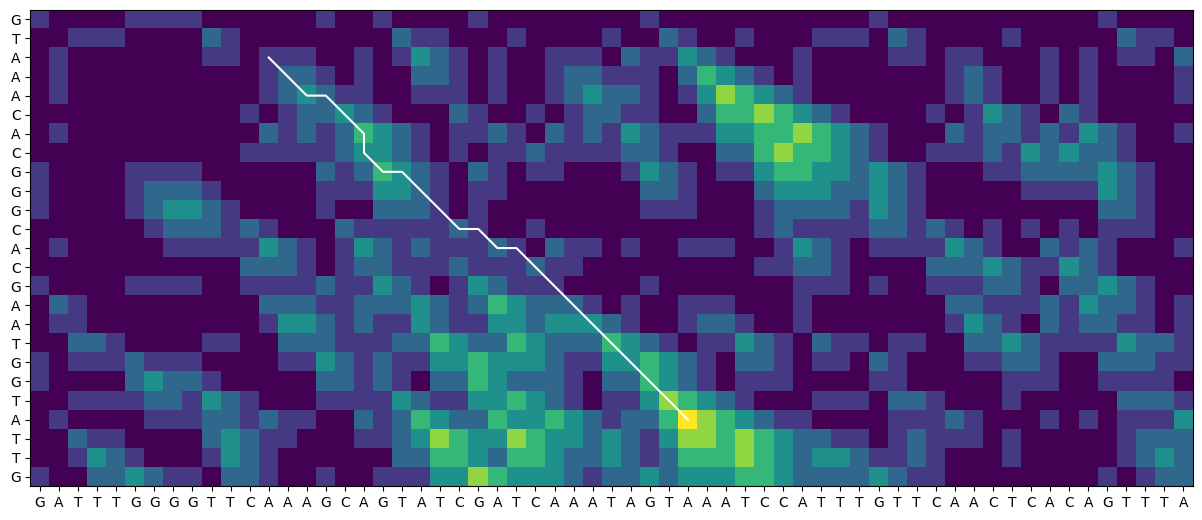

Read                      : GTCGCGCTACGCTCTTGACC
Mapping position (0-based): 15
Aligned read              : GC-GCTA-CGCTC
Aligned read w/o gaps     : GCGCTACGCTC
Number of clipped bases   : 9
Reference subsequence     : GCAGTATCGATC


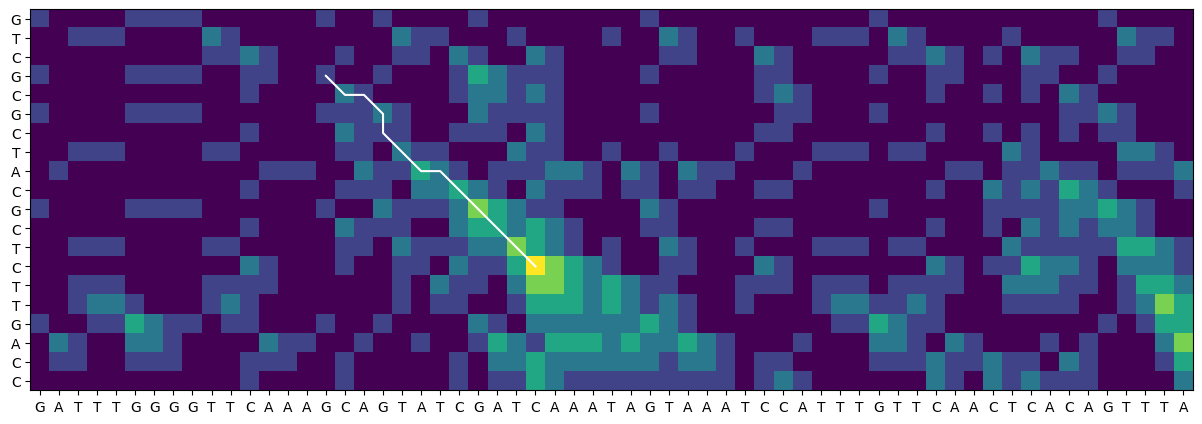

Read                      : ATCCCTTCTAGCTTCCTAC
Mapping position (0-based): 36
Aligned read              : ATCCCTTCTAGCTTC--CT-AC
Aligned read w/o gaps     : ATCCCTTCTAGCTTCCTAC
Number of clipped bases   : 0
Reference subsequence     : ATCCATTTGTTCAACTCAC


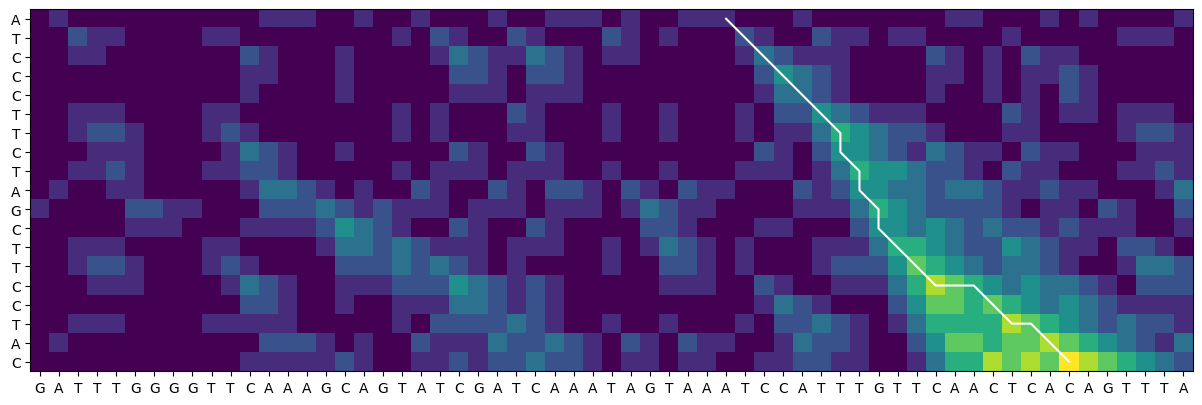

In [11]:
mapping_positions = []
aligned_reads = []

for read in noisy_reads:
    # YOUR CODE
    align = aln.make_align(mode="local")
    read_aln, ref_aln, warp_path_read, warp_path_ref, scoring_mat = align(seq_a=read, seq_b=reference_sequence)
    mapping_position = warp_path_ref[0]
    aligned_read = "".join(read_aln)
    mapping_positions.append(mapping_position)
    aligned_reads.append(aligned_read)

    print(f"Read                      : {read}")
    print(f"Mapping position (0-based): {mapping_position}")
    print(f"Aligned read              : {aligned_read}")
    aligned_read_without_gaps = list(filter(lambda elem: elem != "-", read_aln))
    print(f"Aligned read w/o gaps     : {''.join(aligned_read_without_gaps)}")
    print(f"Number of clipped bases   : {len(read) - len(aligned_read_without_gaps)}")
    print(
        f"Reference subsequence     : "
        f"{reference_sequence[warp_path_ref[0] : (warp_path_ref[-1] + 1)]}"
    )

    plt.figure(figsize=(15, 8))
    plt.imshow(X=scoring_mat)
    plt.plot(warp_path_ref, warp_path_read, "w")
    plt.xticks(ticks=range(len(reference_sequence)), labels=reference_sequence)
    plt.yticks(ticks=range(len(read)), labels=read)
    plt.show()

We now have the following set of aligned reads:

In [12]:
print(f"Reference: {reference_sequence}")
for i, (pos, seq) in enumerate(zip(mapping_positions, aligned_reads)):
    print(f"Read {i:4}: {' ' * pos}{seq}")

Reference: GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTTA
Read    0:                                               TCAA-T-ACAAGTT
Read    1:                          TCAACAGAGCTGAAAGCACA
Read    2:                           CAAACTAG-AAGAT
Read    3:                 CATGTGATCG
Read    4:                       CGA-C-AACA--AAATCCTA
Read    5:                   GTATCGACC
Read    6:                   GTA-CGA--AAA
Read    7:          TTTAACGCCGT
Read    8:                GCA--AACG-TCAA
Read    9:                                      TCC-TATAG-TC-A-TCAC
Read   10:                                     ATCCCTCTGTTC
Read   11:                            AAATAG-GAGTC
Read   12:            CAAACCA
Read   13:                          TCAAAT
Read   14:             AAAAAAG-ATC-ACCAGAT
Read   15:                GC-GTA-C-ATTAAACTAGT
Read   16:           TCCAA-CACTA--G-CCAAA
Read   17:             AAA-CACG-GGC-A-CGAATGGTA
Read   18:                GC-GCTA-CGCTC
Read   19:                  

# Variant Calling

Variant calling is a crucial step in analyzing DNA sequence data to identify differences or variations in the genetic code of individuals.
This process involves comparing an individual's DNA sequence (in the form of aligned reads) to a reference sequence to pinpoint variations such as single nucleotide polymorphisms (SNPs), insertions, deletions, and structural alterations.

While there exist many sophisticated variant calling algorithms such as [GATK](https://gatk.broadinstitute.org)'s [HaplotypeCaller](https://gatk.broadinstitute.org/hc/en-us/articles/360037225632-HaplotypeCaller), we will here focus on SNPs only and perform a simple majority voting per locus.

##### ❓ SNP calling via majority vote

Complete the following code to call SNPs via majority voting.

In [17]:
from collections import Counter

pileups = [[] for _ in range(len(reference_sequence))]
snps = {}

# Accumulate the pileups.
for pos, seq in zip(mapping_positions, aligned_reads):
    # YOUR CODE
    for offset, _ in enumerate(seq):
        # It may happen that an aligned read extends beyond the reference sequence.
        # We decided not to generate additional pileups, and hence, we will just ignore
        # the overhanging bases.
        pileup_index = pos + offset
        if pileup_index < len(reference_sequence):
            pileups[pileup_index].append(seq[offset])
# print(pileups)
# SNP calling via majority voting.
print("POS   REF   MAJ   SNP   PILEUP")
for i, pileup in enumerate(pileups):
    majority_base = ""
    snp = "-"

    # Make a pileup string.
    pileup = "".join(pileup)

    # We can only call variants for non-empty pileups.
    if pileup:
        # YOUR CODE
        counter = Counter(pileup)
        majority_base = counter.most_common(1)[0][0]

    # Call it if it's a SNP.
    if majority_base != "-" and majority_base != reference_sequence[i]:
        snp = majority_base
        snps[i] = snp

    print(f"{i:3}   {reference_sequence[i]:3}   {majority_base:3}   {snp:3}   {pileup}")

POS   REF   MAJ   SNP   PILEUP
  0   G                 
  1   A                 
  2   T                 
  3   T                 
  4   T                 
  5   G                 
  6   G                 
  7   G                 
  8   G                 
  9   T     T     -     T
 10   T     T     -     TT
 11   C     C     -     TCC
 12   A     A     -     AAACA
 13   A     A     -     AAAAA
 14   A     A     -     CAAAA
 15   G     G     -     GGCAG--G
 16   C     C     -     CCCCACCCC
 17   A     A     -     ACAAA-AA-
 18   G     G     -     TGGG-GGCCG
 19   T     T     -     GTTT--TTGC
 20   A     A     -     TAAAAAA-T
 21   T     -     -     GT-AT--GA
 22   C     C     -     ACCCCCC-G-
 23   G     G     -     TGGGG--GCC
 24   A     A     -     CAAA-AA--G
 25   T     T     -     TG-C-TTCTCAC
 26   C     C     -     CCCC-CCCTC-T
 27   A     A     -     AA-AAAAAAACC
 28   A     A     -     AAAAAAAGAAG
 29   A     A     -     CAAAAAAAAA
 30   T     C     C     ACCTTTCA
 31   A     T 

In [18]:
# List all SNPs.
print("POS   SNP")
for pos, snp in snps.items():
    print(f"{pos:3}   {snp:3}")

POS   SNP
  0      
  1      
  2      
  3      
  4      
  5      
  6      
  7      
  8      
 30   C  
 31   T  
 32   A  
 33   G  
 34   T  
 40   C  
 42   A  
 43   C  
 44   A  
 45   G  
 53   C  
 56   A  
 57   G  
 60      
